In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
nb = pd.read_csv('../Datasets/NB.csv')
nb['Fault'] = 0

ir = pd.read_csv('../Datasets/IR - 7.csv')
ir['Fault'] = 1

In [3]:
dataset = nb.append(ir)
dataset

C:\Users\loaia\AppData\Local\Temp\ipykernel_92\156461942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = nb.append(ir)


,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
121150,0.135958,-0.047255,1
121151,-0.083167,-0.070882,1
121152,0.391469,-0.181005,1
121153,0.185501,0.136011,1


In [4]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

In [8]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

classifier = Classifier()
optimizer = optim.SGD(classifier.parameters(), lr=0.01)
criterion = nn.BCELoss()

# Print model summary
print(classifier)

Classifier(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [13]:
# Convert Pandas Series to Numpy array
y_train = np.array(y_train)

for epoch in range(20):
    running_loss = 0.0
    for i in range(0, len(X_train), 32):
        inputs = torch.tensor(X_train[i:i+32], dtype=torch.float32)
        labels = torch.tensor(y_train[i:i+32], dtype=torch.float32)
        labels = labels.view(-1, 1)  # Reshape labels to match outputs
        
        optimizer.zero_grad()
        
        outputs = classifier(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / (len(X_train) / 32)))

Epoch 1 loss: 0.368
Epoch 2 loss: 0.314
Epoch 3 loss: 0.313
Epoch 4 loss: 0.313
Epoch 5 loss: 0.312
Epoch 6 loss: 0.312
Epoch 7 loss: 0.312
Epoch 8 loss: 0.312
Epoch 9 loss: 0.312
Epoch 10 loss: 0.312
Epoch 11 loss: 0.312
Epoch 12 loss: 0.312
Epoch 13 loss: 0.312
Epoch 14 loss: 0.312
Epoch 15 loss: 0.312
Epoch 16 loss: 0.312
Epoch 17 loss: 0.312
Epoch 18 loss: 0.312
Epoch 19 loss: 0.312
Epoch 20 loss: 0.312


In [16]:
y_pred = []
with torch.no_grad():
    for i in range(0, len(X_test), 32):
        inputs = torch.tensor(X_test[i:i+32], dtype=torch.float32)
        outputs = classifier(inputs)
        y_pred.extend(outputs.numpy() > 0.5)

In [20]:
y_test = np.array(y_test)
correct = 0
total = 0
with torch.no_grad():
    for i in range(0, len(X_test), 32):
        inputs = torch.tensor(X_test[i:i+32], dtype=torch.float32)
        labels = torch.tensor(y_test[i:i+32], dtype=torch.float32)
        labels = labels.view(-1, 1)  # Reshape labels to match outputs
        
        outputs = classifier(inputs)
        predicted = (outputs > 0.5)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print('Test accuracy: %.3f' % accuracy)

Test accuracy: 0.873


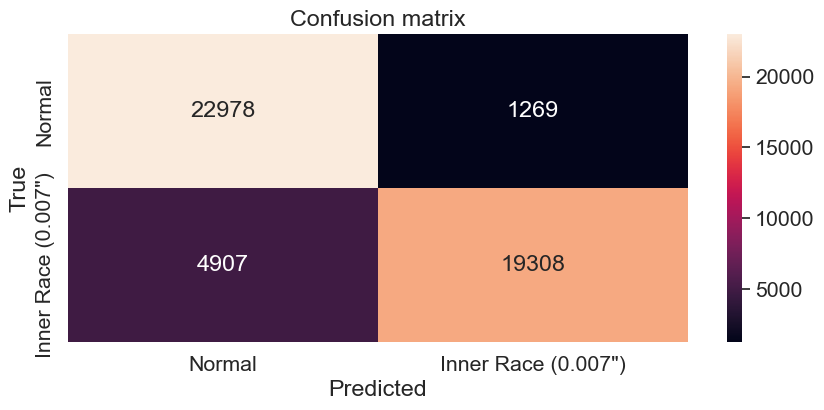

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Inner Race (0.007")']  
columns = ['Normal', 'Inner Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [24]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Inner Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.82      0.95      0.88     24247
Inner Race (0.007")       0.94      0.80      0.86     24215

           accuracy                           0.87     48462
          macro avg       0.88      0.87      0.87     48462
       weighted avg       0.88      0.87      0.87     48462



In [25]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 6176
